# Logistic map

The discrete logistic map is
$$
x_{n+1} = r x_n(1-x_n)
$$

"**Citation info**: Boeing, G. 2016. \"[Visual Analysis of Nonlinear Dynamical Systems: Chaos, Fractals, Self-Similarity and the Limits of Prediction](http://geoffboeing.com/publications/nonlinear-chaos-fractals-prediction/).\" *Systems*, 4 (4), 37. doi:10.3390/systems4040037.\n",

Pynamical documentation: http://pynamical.readthedocs.org



### To draw these cobweb plots, pynamical does the following:
    
    1. Let $x = 0.5$,
    2. Start on the x-axis at the point $(x, 0)$,
    3. Draw a vertical line to the red function curve: this point has the coordinates $(x, f(x))$,
    4. Draw a horizontal line from this point to the gray diagonal line: this point has the coordinates $(f(x), f(x))$,
    5. Draw a vertical line from this point to the red function curve: this point has the coordinates $(f(x), f(f(x)))$,
    6. Repeat steps 4 and 5 recursively one hundred times

In [1]:
from pynamical import cobweb_plot
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image
%matplotlib inline

## Draw cobweb plots for several values of r


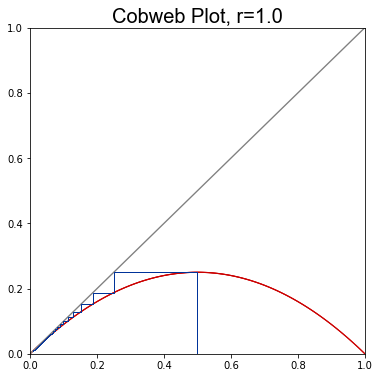

In [2]:
cobweb_plot(r=1.0,save=False )

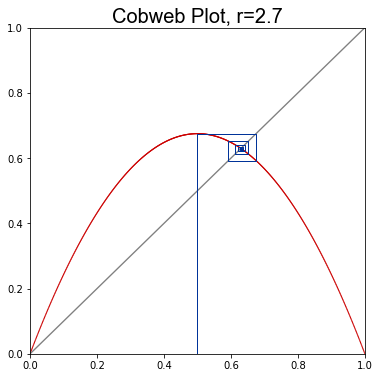

In [3]:
cobweb_plot(r=2.7, save=False)

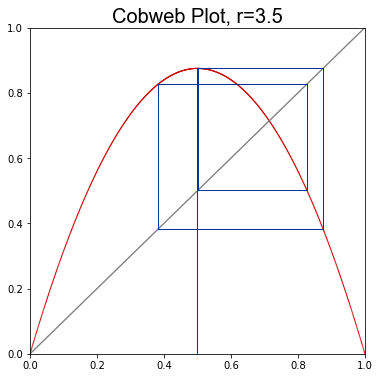

In [4]:
cobweb_plot(r=3.5, save=False)

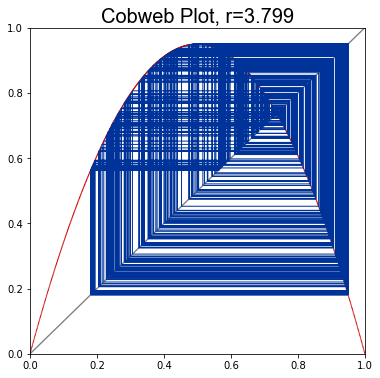

In [69]:
#cobweb_plot(r=3.799, cobweb_n=500, save=False)
cobweb_plot(r=3.799, cobweb_n=500, num_discard = 300,  save=False)

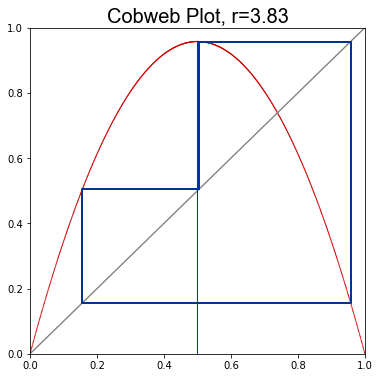

In [81]:
#cobweb_plot(r=3.83, cobweb_n=400, save=False)
cobweb_plot(r=3.83, cobweb_n=400, num_discard = 0,  save=False)

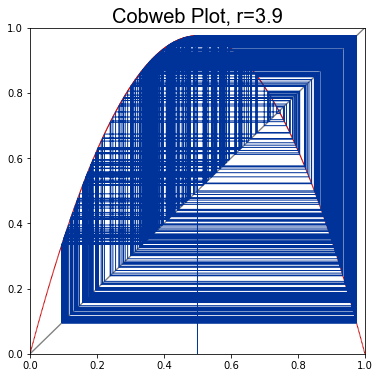

In [64]:
cobweb_plot(r=3.9, cobweb_n=400, save=False)

In [67]:
? cobweb_plot

## Demonstrate a basin of attraction with three different initial values and same r

In [ ]:
cobweb_plot(r=2.7, save=False, cobweb_x=0.1)

In [ ]:
cobweb_plot(r=2.7, save=False,  cobweb_x=0.7)


In [ ]:
cobweb_plot(r=2.7, save=False, cobweb_x=0.9)


In [ ]:
cobweb_plot(r=3.5,save=False,  cobweb_x=0.1)


In [ ]:
cobweb_plot(r=3.5, save=False, cobweb_x=0.7)


## Now animate it!

In [20]:
IPdisplay.Image(url = "animated-logistic-cobweb.gif")

In [29]:
### Let us plot the values of the sequence as function of number of iterations

/Users/albertomaspero/Library/Python/3.7/lib/python/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


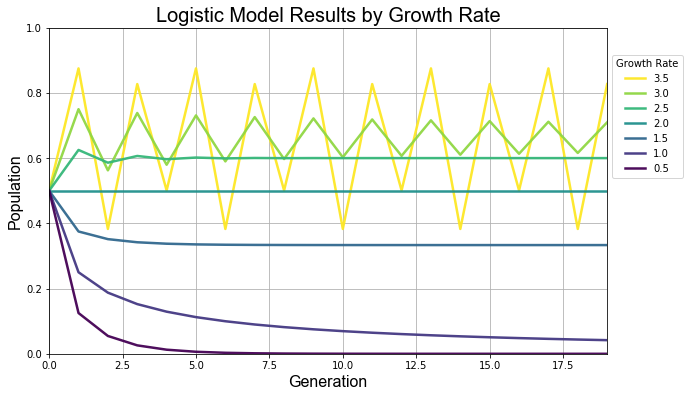

In [30]:
import pandas as pd, numpy as np, IPython.display as display, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline

title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()


# run the logistic model for 20 generations for 7 growth rates between 0.5 and 3.5 then view the output
pops = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=7)
pops.applymap(lambda x: '{:03.3f}'.format(x))

def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors


# plot the results of the logistic map run for these 7 different growth rates
#color_list = ['#cc00cc', '#4B0082', '#0066cc', '#33cc00', '#cccc33', '#ff9900', '#ff0000']
color_list = get_colors('viridis', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops.columns))):
    ax = pops[rate].plot(kind='line', figsize=[10, 6], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)


plt.show()

We see that for $0.0 < r \leq 2.5$ the sequence converges to a unique fixed point.
Then for $r = 3$ it appears a stable periodic orbit of period $2$, and for $r = 3.5$ a periodic orbit of period $4$


What happens for $r = 0.9?$

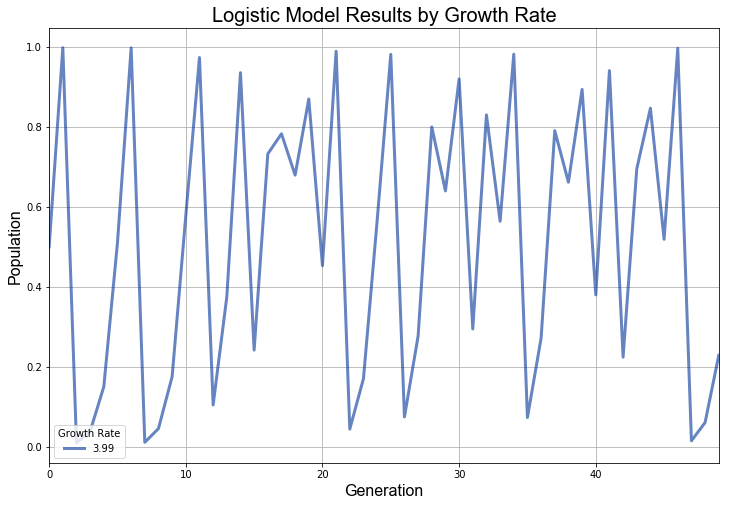

In [46]:
# plot the numeric output of the logistic model for growth rates of 3.9 and 3.90001
# this demonstrates sensitive dependence on the parameter
rate1 = 3.99


pops = simulate(num_gens=50, rate_min=rate1, num_rates = 1)
ax = pops.plot(kind='line', figsize=[12, 8], linewidth=3, alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_title('Logistic Model Results by Growth Rate', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(title='Growth Rate', loc=3)

plt.show()

### A game for you...

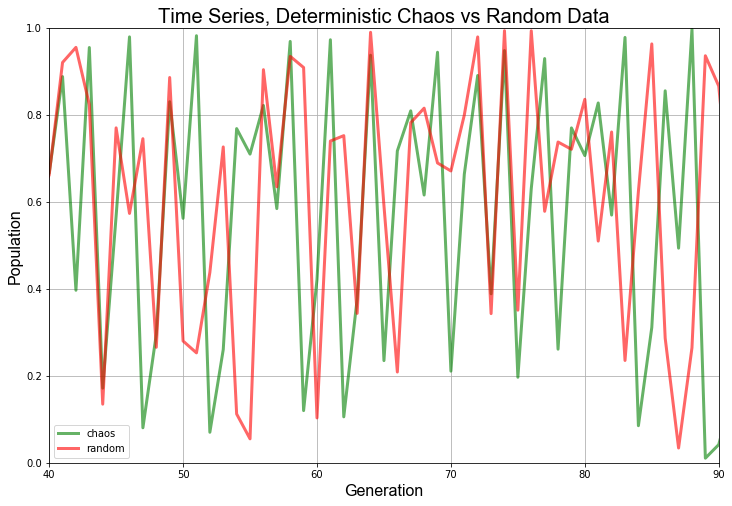

In [52]:
# sometimes it is hard to tell if a time series is chaotic or random
# generate two time series of 1,000 steps, one chaotic and one random
# generate 30,000 time steps for the chaotic series but only keep the final 1,000 (when system is fully evolved)
total_gens = 30000
gens = 1000
np.random.seed(500)

chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)

random_pops = pd.DataFrame(np.random.random(gens), columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']

# plot the chaotic and random time series to show how they are sometimes tough to differentiate
ax = time_series.plot(kind='line', figsize=[12, 8], linewidth=3, alpha=0.6, style=['g','r'])
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Time Series, Deterministic Chaos vs Random Data', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
#ax.legend(loc=3)


plt.show()


## ω-limit sets

Let us look for the $\omega$-limit sets of the points for different values of the parameters

In [21]:
import pynamical
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay
%matplotlib inline

### First, let's a create a phase diagram to show the logistic map's fixed-point attractor at 0.655 when the growth rate parameter is set to 2.9

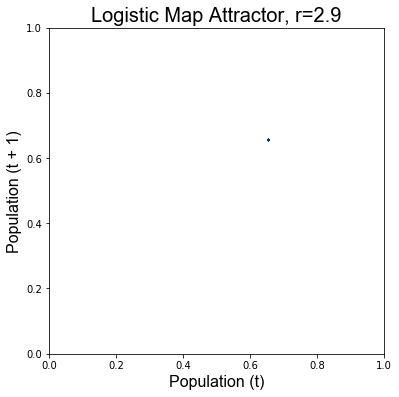

In [22]:
# draw a phase diagram for 200 generations for the growth rate parameter 2.9
# it shows points converging on 0.655 because the logistic map has a fixed-point attractor at 0.655 when r=2.9
pops = simulate(num_gens=200, rate_min=2.9, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=2.9', size=20)

### Next, let's create phase diagrams to show the logistic map's limit cycle attractor when the growth rate parameter is set to 3.2

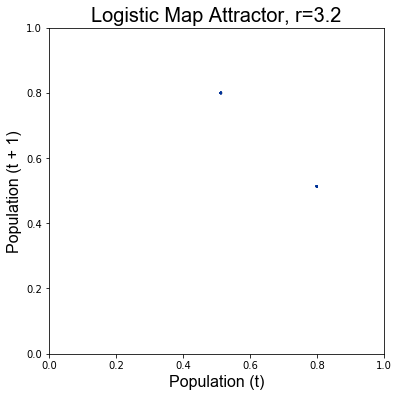

In [24]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.2
# it shows 4 points because the logistic map has a period of 4 when r=3.2
pops = simulate(num_gens=100, rate_min=3.2, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.2', size=20)

### Next, let's create phase diagrams to show the logistic map's limit cycle attractor when the growth rate parameter is set to 3.5

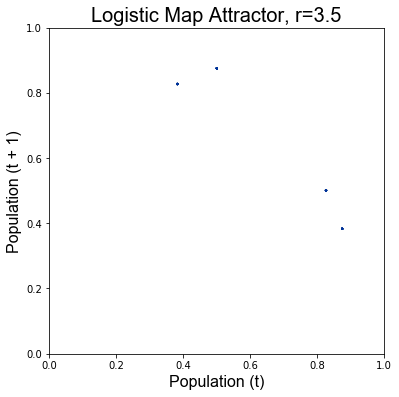

In [23]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.5
# it shows 4 points because the logistic map has a period of 4 when r=3.5
pops = simulate(num_gens=100, rate_min=3.5, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.5', size=20)

### Next, let's create phase diagrams to show the logistic map's limit cycle attractor when the growth rate parameter is set to 3.56

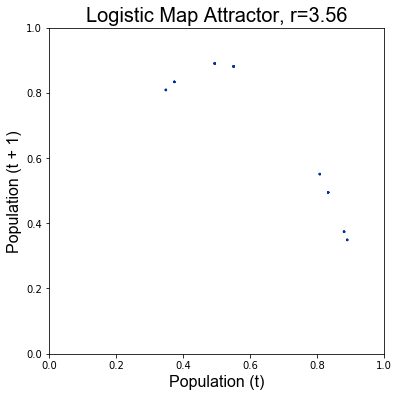

In [25]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.56
# it shows 8 points because the logistic map has a period of 8 when r=3.56
pops = simulate(num_gens=100, rate_min=3.56, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.56', size=20)

### Next, let's create phase diagrams to show the logistic map's limit cycle attractor when the growth rate parameter is set to 3.57

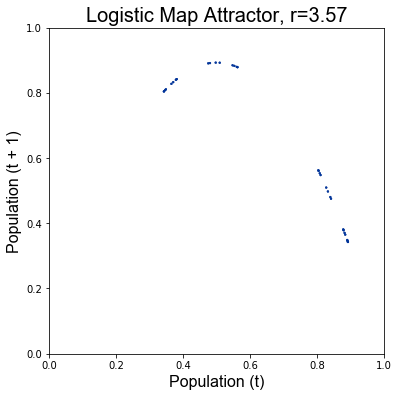

In [26]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.57
# it shows n points because the logistic map has a period of n when r=3.57
pops = simulate(num_gens=100, rate_min=3.57, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.57', size=20)

### Next, let's create phase diagrams to show the logistic map's limit cycle attractor when the growth rate parameter is set to 3.9

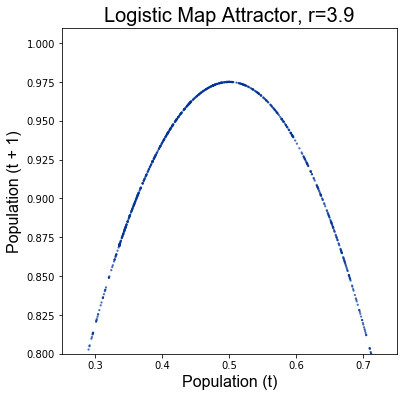

In [27]:
# draw a phase diagram for 2,000 generations for the growth rate parameter 3.9
# the plot reveals the strange attractor - the logistic map is chaotic when r=3.9
pops = simulate(num_gens=2000, rate_min=3.9, num_rates=1)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=20, title='Logistic Map Attractor, r=3.9')

### Now, let's create a phase diagram to show the logistic map's strange attractors across the chaotic regime (from r=3.6 to r=4.0)


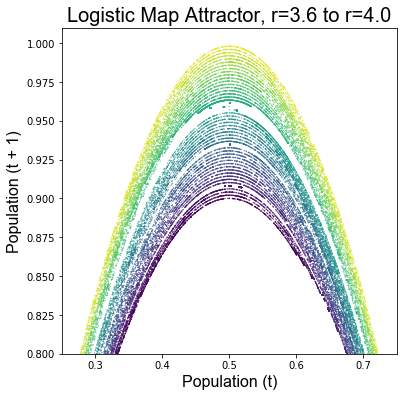

In [28]:
# draw a phase diagram for 2,000 generations across 50 growth rate steps from 3.6 to 4.0
# each chaotic growth rate has its own parabola
pops = simulate(num_gens=2000, rate_min=3.6, rate_max=4.0, num_rates=50)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=7, 
              title='Logistic Map Attractor, r=3.6 to r=4.0', color='viridis')


### Can we differentiate random and chaos by looking at the phase diagram?

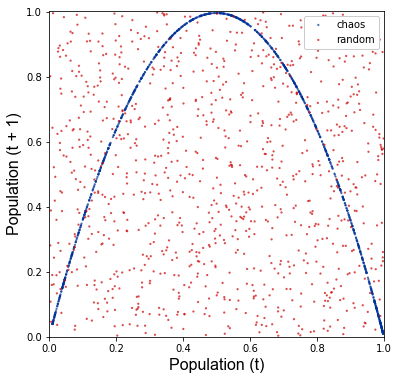

In [53]:
# plot same data as 2D phase diagram instead
pops = pd.concat([chaos_pops, random_pops], axis=1)
pops.columns = ['chaos', 'random']
phase_diagram(pops, size=20, color=['#003399','#cc0000'], ymax=1.005, legend=True, 
              filename='logistic-attractor-chaos-random')

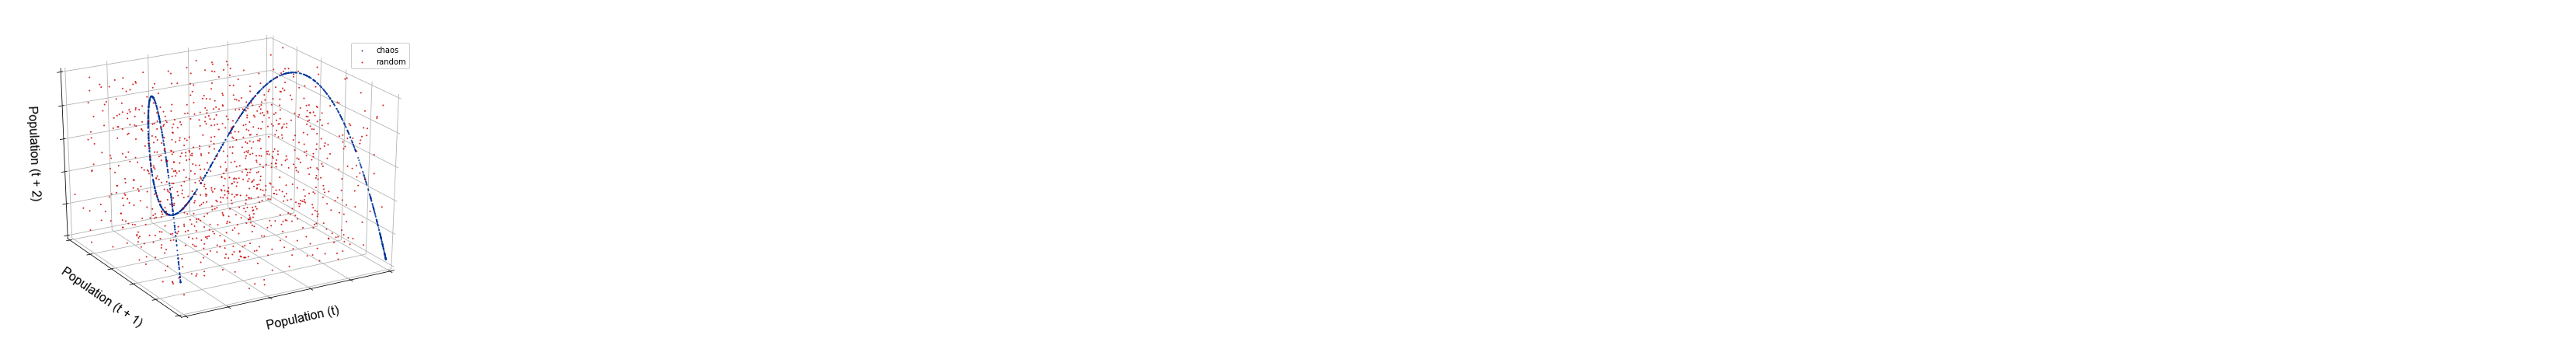

In [54]:
# plot same data as 3D phase diagram instead
phase_diagram_3d(pops, color=['#003399','#cc0000'], filename='logistic-attractor-chaos-random-3d',
                 legend=True, legend_bbox_to_anchor=(0.94, 0.9))

## Final game: let us plot the bifurcation diagram 

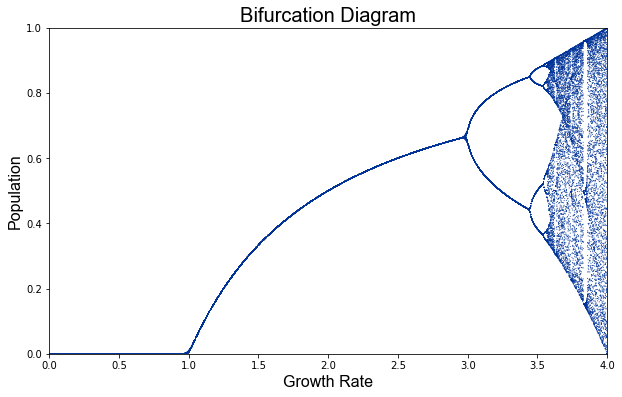

In [56]:
from pynamical import simulate, bifurcation_plot, save_fig

# plot the bifurcation diagram for 200 generations, but this time throw out the first 100 rows
# 200-100=100, so we still have 100 generations in the plot, just like in the previous cell
# this will show us only the attractors (aka, the values that each growth rate settles on over time)
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, filename='logistic-map-bifurcation-1')

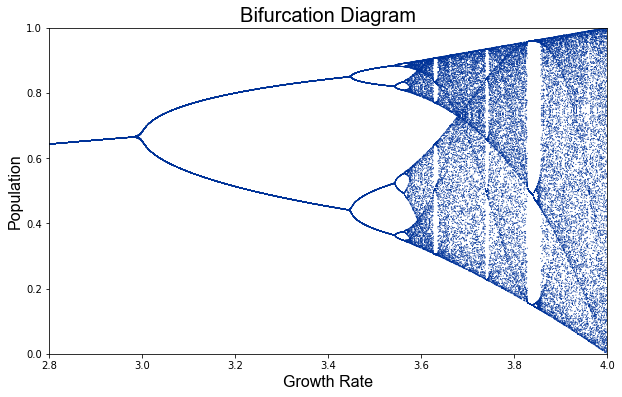

In [57]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = simulate(num_gens=100, rate_min=2.8, rate_max=4, num_rates=1000, num_discard=200, initial_pop=0.1)
bifurcation_plot(pops, xmin=2.8, xmax=4, filename='logistic-map-bifurcation-2')

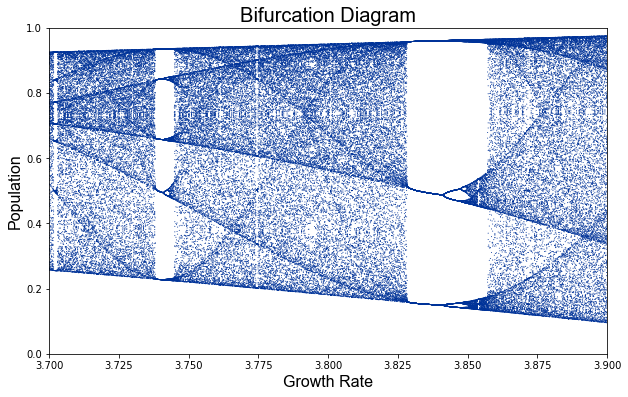

In [84]:
# run the model for 200 generations across 1,000 growth rate steps from 3.7 to 3.9, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows more detail in the chaotic regimes
pops = simulate(num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9, filename='logistic-map-bifurcation-3')

Wait, what is happening between $r = 3.27$ and $r = 3.86$??

In the chaotic regime (r=3.6 to r=4.0), the system has a strange attractor with fractal structure


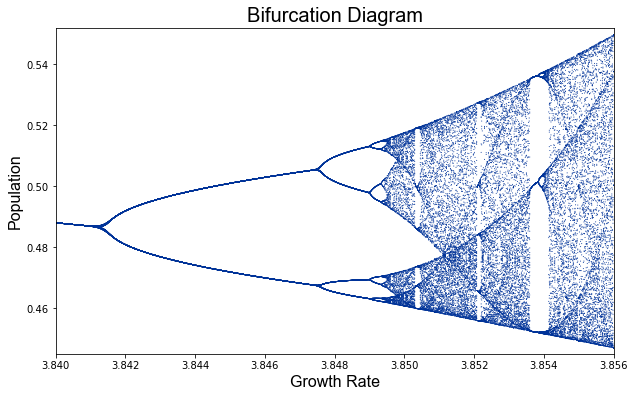

In [59]:
# run the model for 500 generations across 1,000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# throw out the first 300 generations, so we end up with 200 generations in the plot
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
pops = simulate(num_gens=200, rate_min=3.84, rate_max=3.856, num_rates=1000, num_discard=300)
bifurcation_plot(pops, xmin=3.84, xmax=3.856, ymin=0.445, ymax=0.552, filename='logistic-map-bifurcation-4')

## For more info:

- [Read the journal article](https://cloudfront.escholarship.org/dist/prd/content/qt71q6x3w9/qt71q6x3w9.pdf?nosplash=c3abc5beadb7a1d27958517820a5909e),
- [Pynamical documentation](http://pynamical.readthedocs.org),
- [Chaos Theory and the Logistic Map](http://geoffboeing.com/2015/03/chaos-theory-logistic-map/),
- [Visualizing Chaos and Randomness with Phase Diagrams](http://geoffboeing.com/2015/04/visualizing-chaos-and-randomness/),
- [Animated 3D Plots in Python](http://geoffboeing.com/2015/04/animated-3d-plots-python/)"